
# Project: Iris Flower Classifier
# 
# This Jupyter Notebook contains code for building a classifier model to predict the species of iris flowers based on their sepal and petal dimensions.
#
# The notebook is organized as follows:
# - Importing necessary libraries for data analysis and visualization.
# - Loading the Iris dataset and performing initial exploration.
# - Preprocessing the data by scaling features and handling missing values if any.
# - Exploratory Data Analysis (EDA) to understand the distribution of features and relationships between them.
# - Building a machine learning model using K-means clustering.
# - Further analysis using hierarchical clustering.
#
# By the end of this notebook, we aim to have a well-organized codebase with comments to guide the reader through each step of the analysis and model building process.
# 


In [21]:
# Begin by importing pandas and seaborn, a data analysis tookit and graphing library, respectively. 
import pandas as pd   # Import pandas for data manipulation and analysis.
import numpy as np     # Import numpy for numerical computations.

import matplotlib.pyplot as plt  #Import matplotlib for creating static, interactive, and animated visualizations in Python.
import seaborn as sns       # Import seaborn for statistical data visualization.

from sklearn.cluster import KMeans           # Import KMeans from scikit-learn for K-means clustering algorithm.
from sklearn.metrics import silhouette_score # Import silhouette_score for evaluating clustering performance.
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling.
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for standardizing features.

import plotly.graph_objects as go   # Import graph_objects from Plotly for interactive plotting.
import plotly.express as px         # Import express from Plotly for easy plotting.
from scipy.cluster.hierarchy import linkage, dendrogram  # Import linkage and dendrogram for hierarchical clustering.

# To ignore warnings, use the following code to make the display more attractive.
import warnings
warnings.simplefilter(action='ignore')

In [22]:
#To import the Iris dataset:

iris = pd.read_csv("D:\\IRIS dataset.csv")     # the iris dataset is now a Pandas DataFrame

# Extracting features from the dataset.
x = iris.iloc[:, [0, 1, 2, 3]].values  # Selecting columns containing feature values.


#To view Iris data below:
iris.info()  # Display summary information about the Iris dataset, including column data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Statistical summary 

In [23]:
# Personal reusable function for detecting missing data
def missing_value_describe(data):
    """
    This function calculates and prints statistics about missing values in the given dataset.

    Parameters:
    - data: Pandas DataFrame
        The dataset to analyze for missing values.
    """
    # Check missing values in the dataset
    missing_value_stats = (data.isnull().sum() / len(data) * 100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    
    print("Number of columns with missing values:", missing_value_col_count)
    
    if missing_value_col_count != 0:
        # Print out column names with missing value percentage
        print("\nMissing percentage (descending):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")

# Call the function to analyze the Iris dataset for missing values
missing_value_describe(iris)

Number of columns with missing values: 0
No missing data!!!


In [24]:
# dimension
print("the dimension:", iris.shape)   # number of rows and columns.

the dimension: (150, 5)


We can see we have a dataset with 150 observations and each observation has 6 columns. 4 of the columns are numeric attributes we can use to train machine learning models and the last column is the label of a given flower.

In [25]:
#To check number of uniqe elements in each columns.
iris.nunique() 

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [26]:
# checking the simple statistical parameters 
iris.describe(include='all')

sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN

 Let's interpret the above statistical desciption of our dataset:
 
 The descriptoin shows we have data with super low std(standard deviation)
 
 the range of the SepalLengthCm is: 4.300000 - 7.900000
 
 the range of the SepalWidthCm is: 2.000000 - 4.400000
 
 the range of the PetalLengthCm is: 1.000000 - 6.900000
 
 the range of the PetalWidthCm is: 0.100000 - 2.500000

Since we are predicting the class of a given flower, let's exam what's the class distribution for this dataset¶

In [27]:
# Samples for each species by frequency distribution
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [28]:
# Calculating the mean for each feature by species
iris.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

In [29]:
# Displaying the first few rows of the Iris dataset with background gradient
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

In [30]:
# Setting up training data
X = iris.iloc[:, :-1].values  # Extract features (all columns except the last one) and store them in X.
y = iris.iloc[:, -1].values   # Extract target variable (the last column) and store it in y.

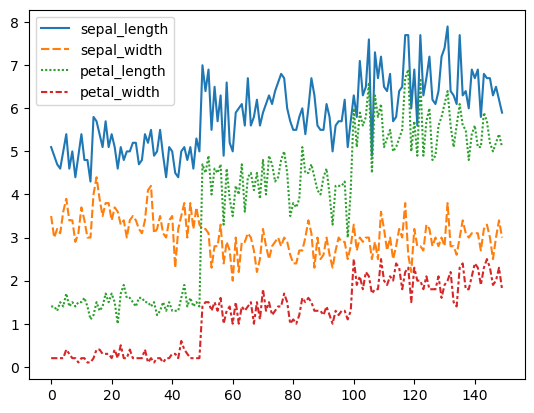

In [12]:
# Visualizing data using a line plot
sns.lineplot(data=iris.drop(['species'], axis=1))
plt.show()

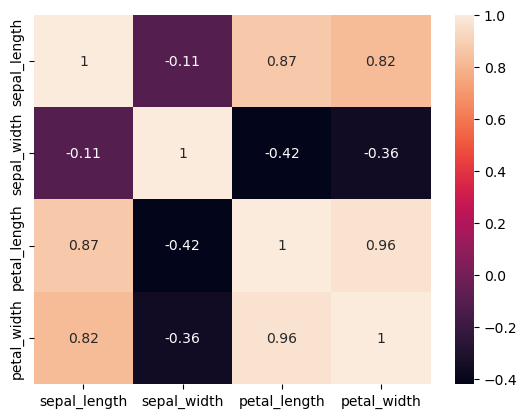

In [13]:
# Creating a heatmap to visualize the correlation matrix
sns.heatmap(iris.corr(), annot=True)          # annot = annotations
plt.show()

In [31]:
# Creating separate datasets for each species
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

In [15]:
# Creating a scatter plot using Plotly Express
fig = px.scatter(data_frame=iris, x='sepal_length',color='species')
# Customizing the layout of the plot
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [16]:
fig = px.scatter(data_frame=iris, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [17]:
fig = px.scatter(data_frame=iris, x='petal_length',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

In [18]:
fig = px.scatter(data_frame=iris, x='petal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='petalwidth',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

Multivariate scatter plot helps us to visualize the pair-wise relationship in our dataset

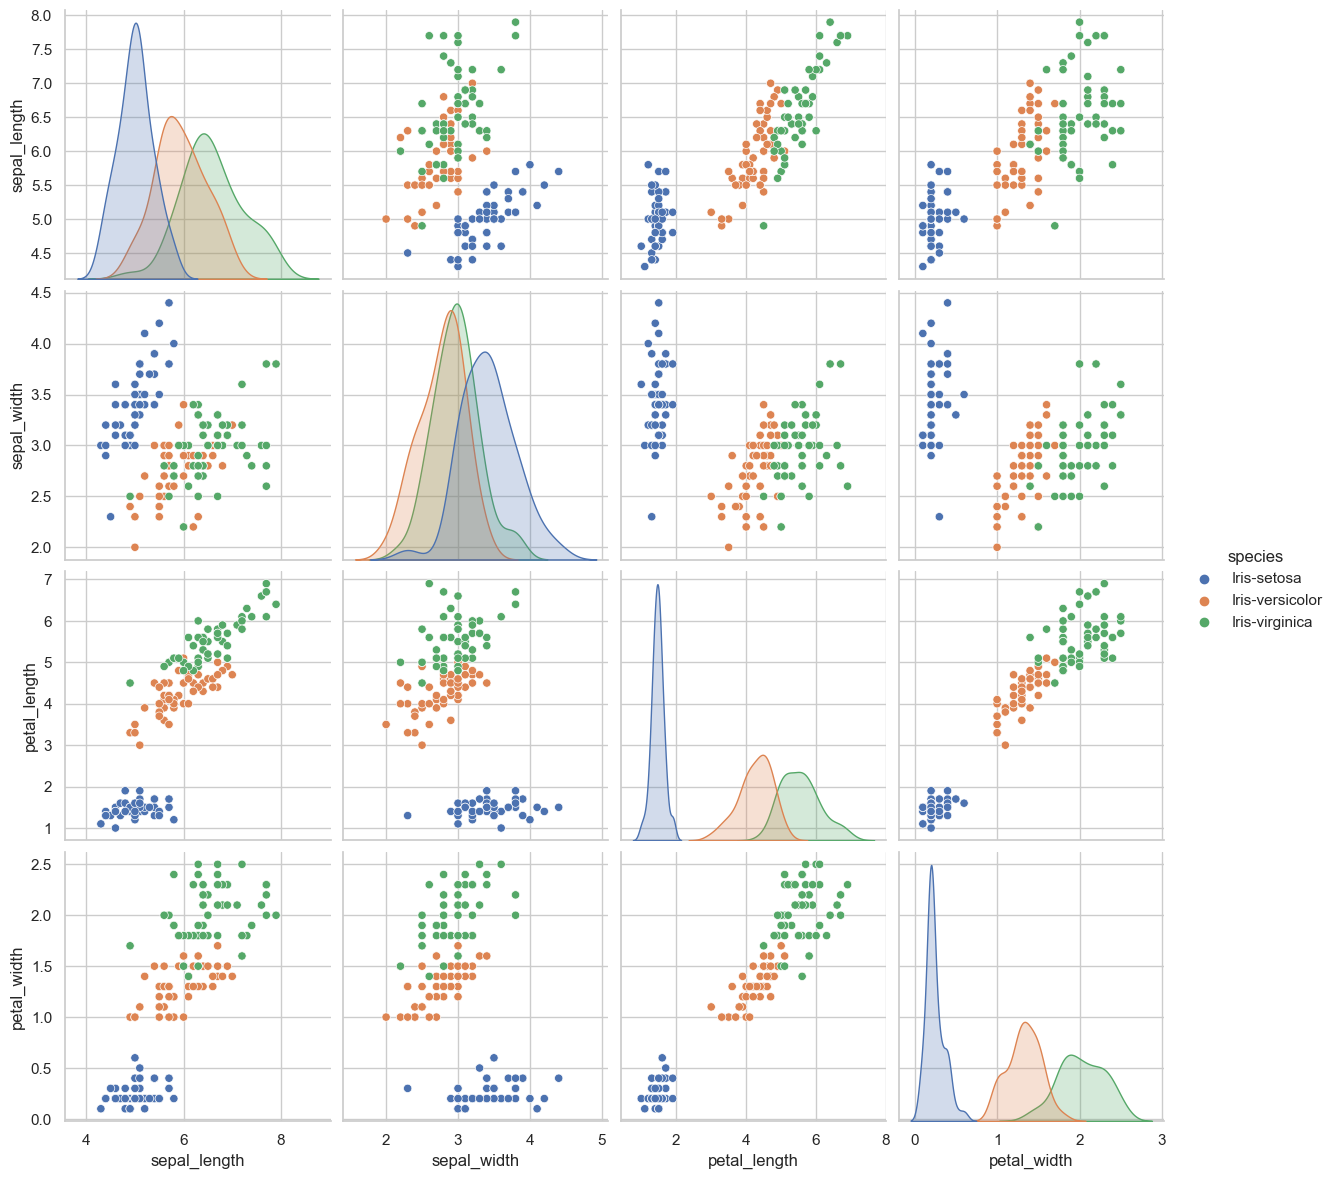

In [19]:
#Use pairplot to analyze the relationship between species for all characteristic combinations. 

sns.set(style="whitegrid")
sns.pairplot(iris,hue="species", size=3) 
plt.show()

# An observable trend shows a close relationship between two of the species

### In the above scatter plot, we can see PetalWidthCm and PetalLengthCm has the strongest pari-wise relationship for classification. Each class are separated clearly for the pair-wise scatter plot between PetalWidthCm and PetalLengthCm

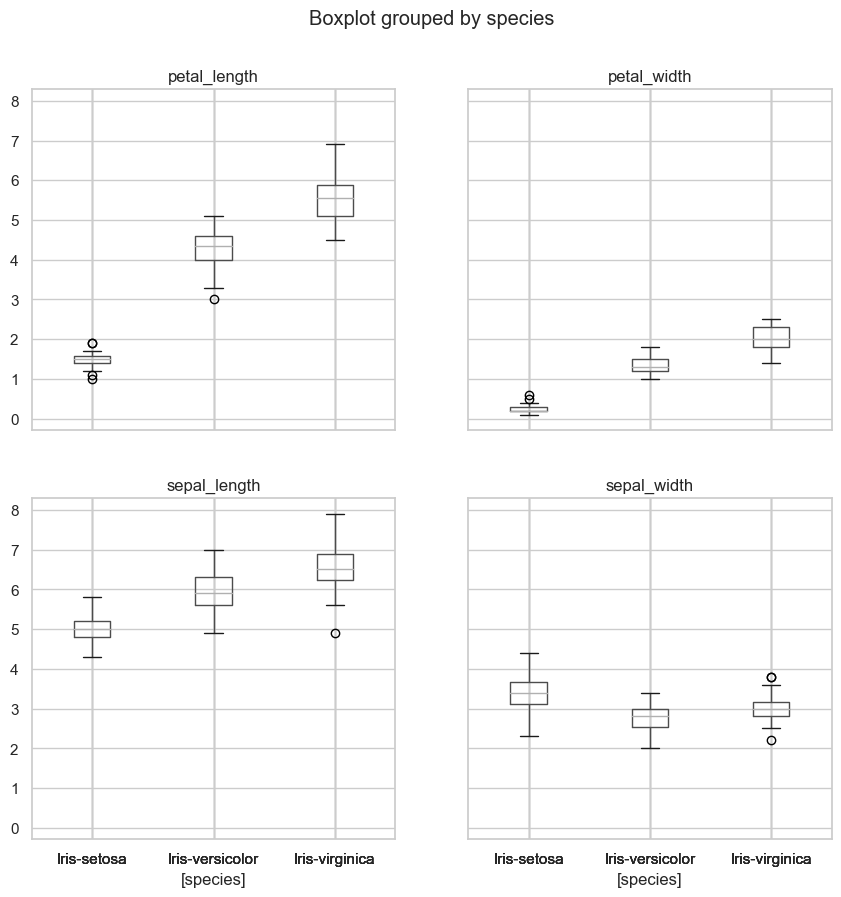

In [20]:
# To make a Pandas boxplot grouped by species, use .boxplot
# Modify the figsize, by placing a value in the X and Y cordinates
iris.boxplot(by="species", figsize=(10, 10))
plt.show()

**Distribution plots**

plot each flower to a histogram

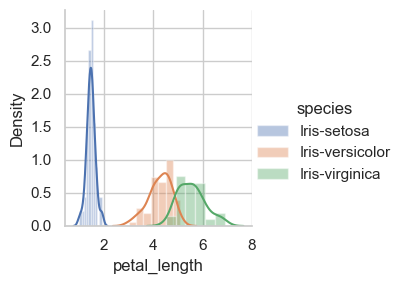

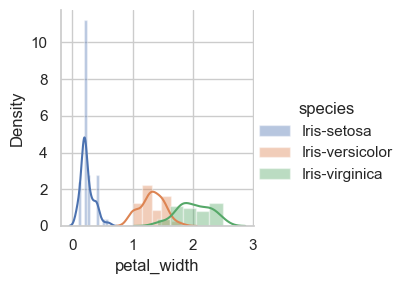

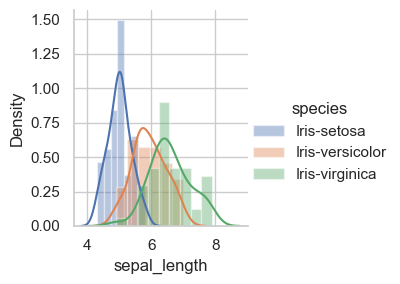

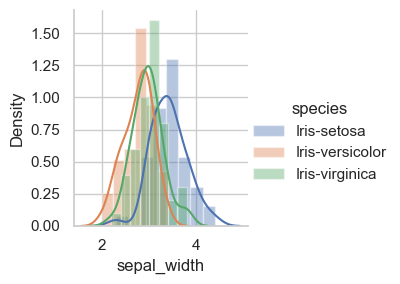

In [21]:
# Creating FacetGrids to plot distributions of features by species
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_width").add_legend()
plt.show()

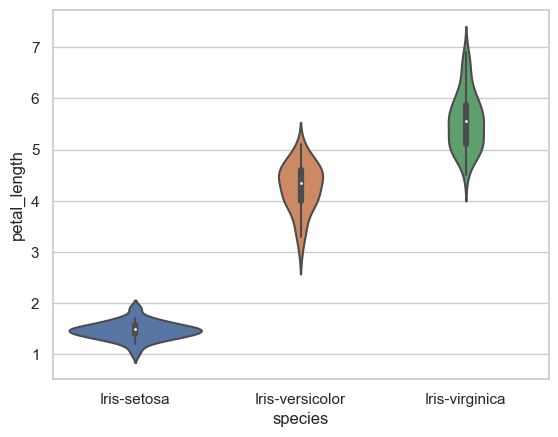

In [22]:
# A violin plot shows the density of the data, simularly to a scatter plot, and presents catagorical data like a box plot.
# Denser regions of the data are fatter.
sns.violinplot(x="species", y="petal_length", data=iris, size=6)
plt.show()

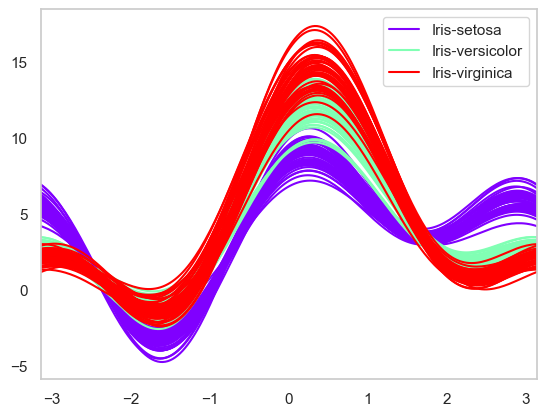

In [23]:
# In Pandas use Andrews Curves to plot and visualize data structure.
# Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
# This useful for detecting outliers in times series data.
# Use colormap to change the color of the curves

from pandas.plotting import andrews_curves
andrews_curves(iris, "species",colormap='rainbow')  # species as the categorical variable
plt.show()

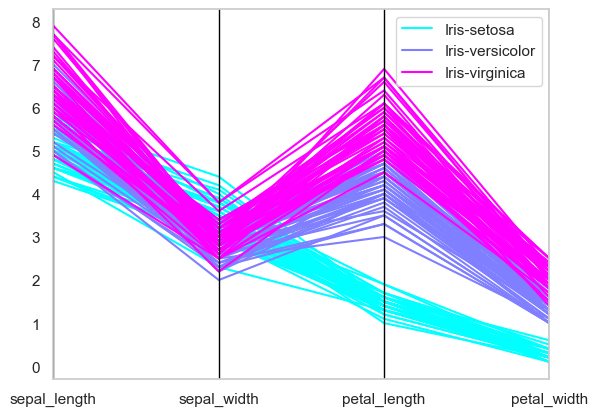

In [24]:
# Parallel_cordinates plot each feature on a seperate column.
# Each feature is then connected by lines, for each data sample
# Colormap can be used to choose an assortment of colors. 
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species",colormap='cool')
plt.show()

K-MEANS

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4

In [32]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []   # Initializing a list to store within-cluster sum of squares (WCSS) values

for i in range(1, 11):
    # Create KMeans model for each number of clusters from 1 to 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)                       # Fit the model to the data
    wcss.append(kmeans.inertia_)       # Append the WCSS value to the list

# Using the elbow method to determine the optimal number of clusters for k-means clustering

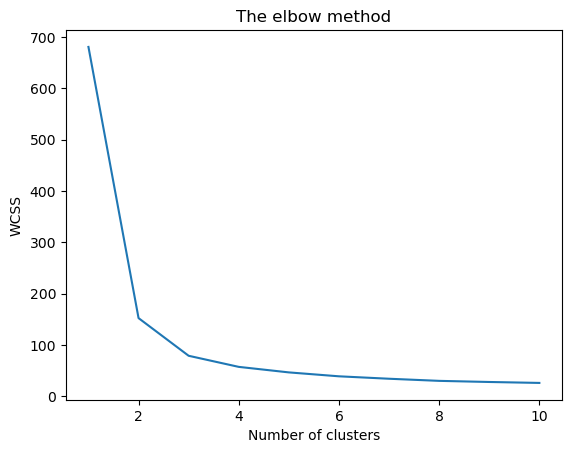

In [33]:
plt.plot(range(1, 11), wcss)    # Plotting the number of clusters against the corresponding WCSS values
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Implementing K-Means Clustering

In [34]:
# Creating KMeans model with 3 clusters and fitting it to the data
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)      # Predicting the cluster labels for the data

In [35]:
# Retrieving the centroids of the clusters
centroids= kmeans.cluster_centers_      # Get the coordinates of the centroids for each cluster
print(centroids)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


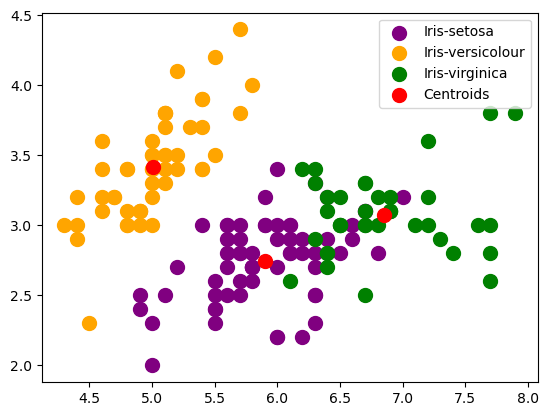

In [36]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

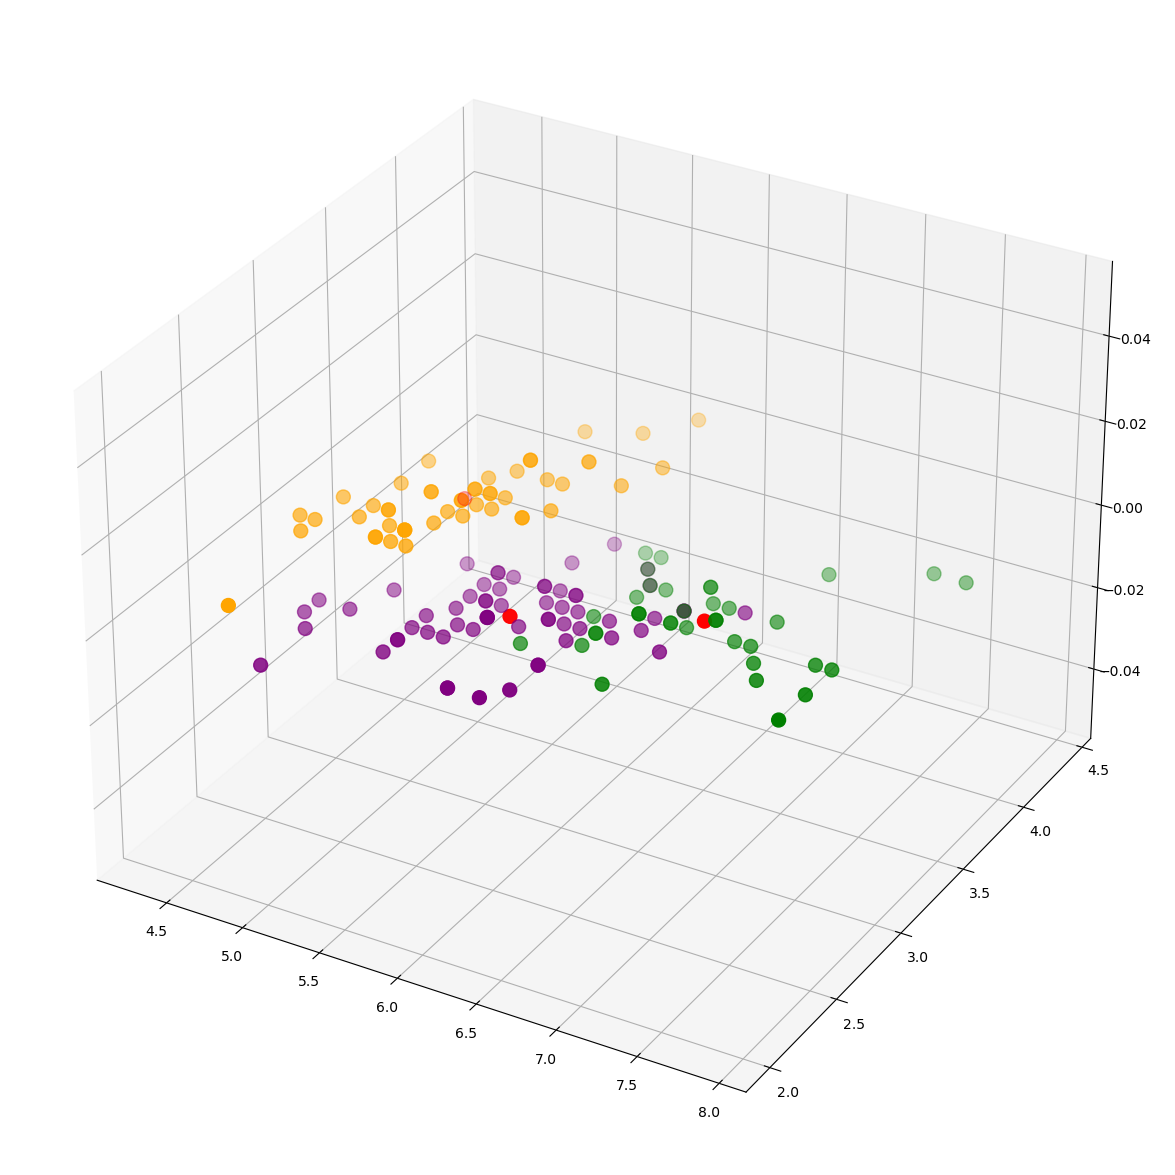

In [37]:
# Creating a 3D scatter plot

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [38]:
cluster=kmeans.labels_        # Assigning cluster labels to a variable

In [39]:
cluster  #our tag values are between 0-2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [40]:
# Adding cluster labels to the Iris dataset
iris["cluster_no"] = cluster  # Add the cluster labels as a new column named "cluster_no" to the Iris dataset
iris.head()  # Display the first few rows of the modified dataset with cluster labels
# simply it divides our data into groups

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   cluster_no  
0           1  
1           1  
2           1  
3           1  
4           1

In [41]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width         species  \
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     cluster_no  
145           2  
146           0  
147           2  
148           2  
149           0

In [42]:
# Creating a Plotly figure
fig = go.Figure()

# Adding scatter plot traces for each cluster
fig.add_trace(go.Scatter(
    x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1],
    mode='markers',marker_color='#DB4CB2',name='Iris-setosa'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1],
    mode='markers',marker_color='#c9e9f6',name='Iris-versicolour'
))

fig.add_trace(go.Scatter(
    x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1],
    mode='markers',marker_color='#7D3AC1',name='Iris-virginica'
))

fig.add_trace(go.Scatter(
    x=centroids[:, 0], y=centroids[:,1],
    mode='markers',marker_color='#CAC9CD',marker_symbol=4,marker_size=13,name='Centroids'
))
# Updating layout
fig.update_layout(template='plotly_dark',width=1000, height=500,)

HIERARCHICAL CLUSTER

In [27]:
import scipy.cluster.hierarchy as sch

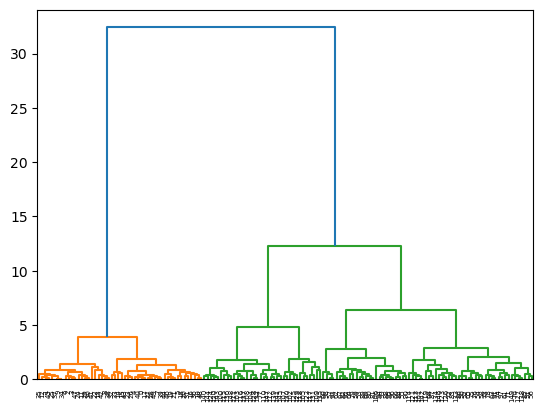

In [28]:
# Generating the dendrogram
dendogram=sch.dendrogram(sch.linkage(x,method="ward"))
plt.show()

* We looked at the hierarchy of clusters with the dendogram, we see that we can choose the optimum number of clusters  ideally 4.

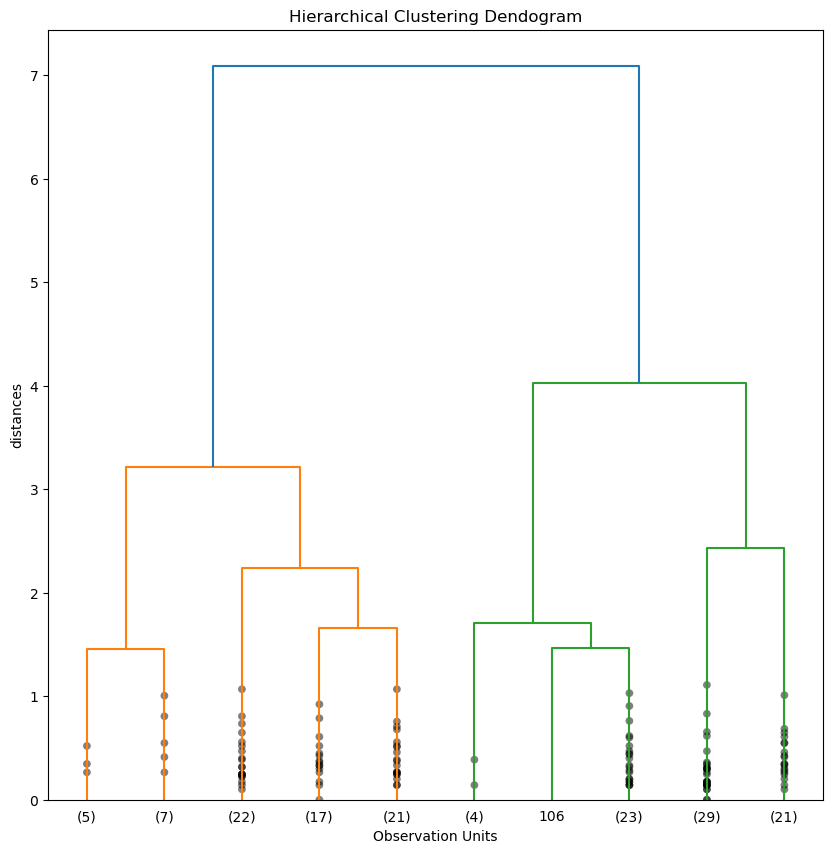

In [29]:
# Creating the dendrogram
plt.figure(figsize=(10,10)) 
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("distances")
dendrogram(linkage(x, "complete"),  # Generating the dendrogram with complete linkage method
           leaf_font_size=10,  # Setting font size for leaf labels
           truncate_mode="lastp",  # Truncating the dendrogram to show last p merged clusters
           p=10,  # Number of clusters to show when truncate_mode=”lastp”
           show_contracted=True)  # Showing contracted dendrogram branches
plt.show()

# Interpretation and insights

Analysis of Cluster Characteristics 

In [30]:
# Compute mean feature values for each cluster
cluster_means = iris.groupby('cluster_no').mean()

In [31]:
# Print cluster centroids and mean feature values
print("Cluster Centroids:")
print(centroids)
print("\nMean Feature Values for Each Cluster:")
print(cluster_means)

Cluster Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Mean Feature Values for Each Cluster:
            sepal_length  sepal_width  petal_length  petal_width
cluster_no                                                      
0               5.901613     2.748387      4.393548     1.433871
1               5.006000     3.418000      1.464000     0.244000
2               6.850000     3.073684      5.742105     2.071053


Relating Clusters to Species of Iris Flowers

In [32]:
# Compare cluster labels to species labels
cluster_species_comparison = pd.crosstab(iris['species'], iris['cluster_no'])

# Print the comparison table
print("Cluster vs. Species Comparison:")
print(cluster_species_comparison)

Cluster vs. Species Comparison:
cluster_no        0   1   2
species                    
Iris-setosa       0  50   0
Iris-versicolor  48   0   2
Iris-virginica   14   0  36
